In [1]:
#Task 1

In [ ]:
import pandas as pd
!pip install geopandas
import geopandas as gpd

In [3]:
nbrhd_shp = gpd.read_file("Neighborhood.shp")

In [4]:
data_crs = nbrhd_shp.crs

In [5]:
flicker_data = pd.read_csv("Flickr_NewYork.csv", header=None)

In [6]:
flicker_data.columns=["Num1", "Num2", "Lat", "Long", "Location", "URL"]

In [7]:
flicker_data = flicker_data.drop(columns="Num1")

In [8]:
flicker_data = flicker_data.drop(columns="Num2")

In [9]:
flicker_data = flicker_data.drop(columns="Location")

In [10]:
flicker_data = flicker_data.drop(columns="URL")

In [11]:
flickr_gdf = gpd.GeoDataFrame(flicker_data, 
                              geometry=gpd.points_from_xy(flicker_data.Long, flicker_data.Lat), 
                              crs=data_crs)

In [16]:
flickr_npnt = flickr_gdf.drop(columns="geometry")

In [17]:
flickr_gdf.head()

,Lat,Long,geometry
0,40.677180,-73.983092,POINT (-73.98309 40.67718)
1,40.684333,-74.002667,POINT (-74.00267 40.68433)
2,40.753677,-73.977212,POINT (-73.97721 40.75368)
3,40.748427,-73.985409,POINT (-73.98541 40.74843)
4,40.759694,-73.978930,POINT (-73.97893 40.75969)


In [18]:
import matplotlib.pyplot as plt

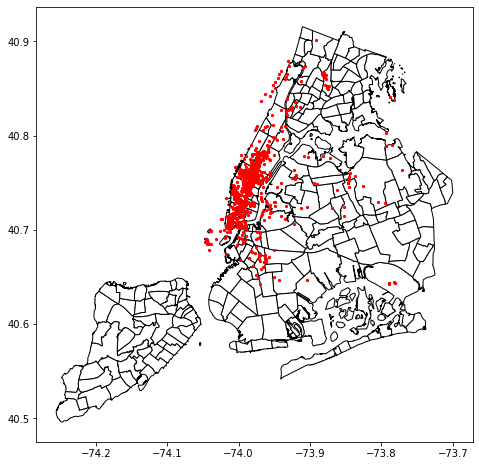

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
nbrhd_shp.plot(ax=ax, color='white',edgecolor='black')
flickr_gdf.plot(ax=ax, color="red", marker="o", markersize=5)

In [20]:
#Task 2

In [21]:
from sklearn.cluster import KMeans

In [22]:
from sklearn.metrics import silhouette_score

In [24]:
scores = []
for k in range(5, 20):
  kmean_model = KMeans(n_clusters=k, random_state=42)
  y_label=kmean_model.fit_predict(flickr_npnt)
  scores.append(silhouette_score(flickr_npnt, y_label))

Text(0, 0.5, 'Silhouette Score')

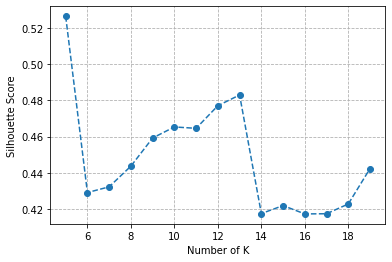

In [25]:
plt.plot(range(5,20), scores, "o--")
plt.grid(linestyle="--")
plt.xlabel("Number of K")
plt.ylabel("Silhouette Score")

In [26]:
#Task 3

In [45]:
import numpy as np

In [64]:
f_array = np.array(flickr_npnt)

In [27]:
kmeans_model = KMeans(n_clusters=13, random_state=42)

In [28]:
color_array = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0',
'#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000',
'#aaffc3', '#808000', '#ffd8b1', '#000075'] 

In [65]:
y_label2 = kmeans_model.fit_predict(f_array)

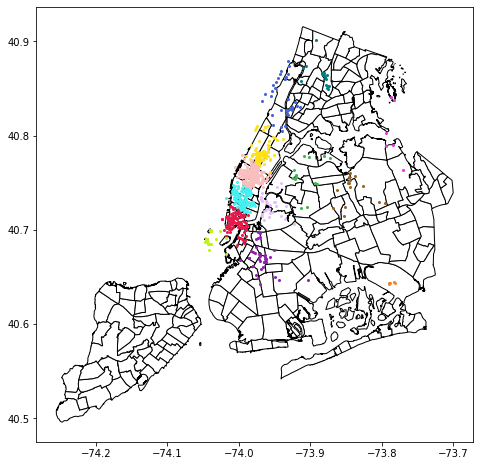

In [89]:
fig, ax = plt.subplots(figsize=(8,8))
nbrhd_shp.plot(ax=ax, color='white',edgecolor='black')
for cluster_i in range(0,kmeans_model.n_clusters):
  plt.plot(f_array[:,1][y_label2==cluster_i], f_array[:,0][y_label2==cluster_i], "o", c = color_array[cluster_i], markersize=2)

In [50]:
#Task 4

In [46]:
from sklearn.cluster import DBSCAN

In [92]:
def plot_dbscan_result(model, X):  
    y_label = model.fit_predict(X)
    unique_label = set(y_label)
    n_cluster = len(unique_label)
    if -1 in unique_label:
        n_cluster = n_cluster - 1
    for cluster_i in range(n_cluster):
        plt.scatter(X[:,1][y_label== cluster_i],X[:,0][y_label== cluster_i], c=color_array_rand[cluster_i])

    # finally plot outlier
    plt.scatter(X[:,1][y_label== -1],X[:,0][y_label== -1], c="k")

In [52]:
dbscan_model = DBSCAN(eps=0.002, min_samples=5)

In [76]:
y_label3 = dbscan_model.fit_predict(f_array)

In [77]:
# get the number of clusters
cluster_count = len(set(y_label3)) - 1 
# the following code defines the color array based on the number of clusters
np.random.seed(42)
color_array_rand = []
for i in range(cluster_count):
 color_array_rand.append('#'+'%06X' % np.random.randint(0, 0xFFFFFF))

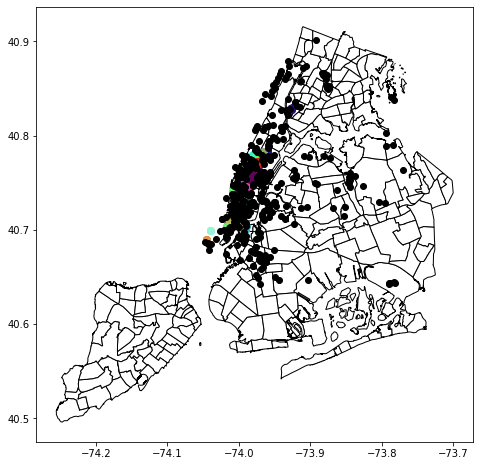

In [93]:
fig, ax = plt.subplots(figsize=(8,8))
nbrhd_shp.plot(ax=ax, color='white',edgecolor='black')
plot_dbscan_result(dbscan_model, f_array)

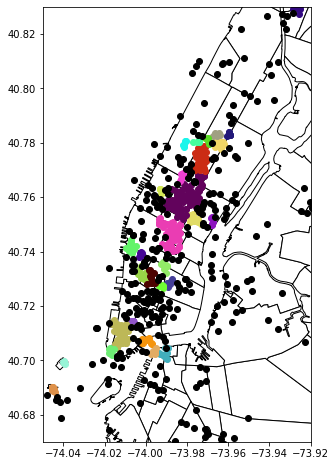

In [85]:
fig, ax = plt.subplots(figsize=(8,8))
nbrhd_shp.plot(ax=ax, color='white',edgecolor='black')
plt.axis([-74.05,-73.92,40.67,40.83]) 
plot_dbscan_result(dbscan_model, f_array)
